In [1]:
import pandas as pd
df_insurance = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/US%20Health%20Insurance%20Dataset/insurance.csv")
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
df_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [3]:
df_insurance['sex'] = df_insurance['sex'].apply({'male':0,'female':1}.get) 
df_insurance['smoker'] = df_insurance['smoker'].apply({'yes':1, 'no':0}.get)
df_insurance['region'] = df_insurance['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,4,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


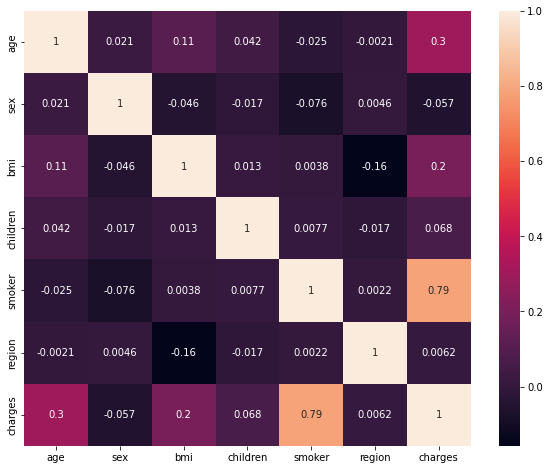

In [4]:
import matplotlib.pylab as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df_insurance.corr(),annot=True)
plt.show()

In [5]:
x = df_insurance[['age','bmi', 'smoker']]
y = df_insurance[['charges']]
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)
print(x.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1338, 3) (1338, 1)
(669, 3) (669, 1)
(669, 3) (669, 1)


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Accuracy: {r2_score(y_test, y_pred)}')

Accuracy: 0.7641938242430081


In [7]:
import numpy as np
tes_x = np.array([24,20.1,0]).reshape(1,3)
print(model.predict(tes_x)[0,0])

740.2506518242899


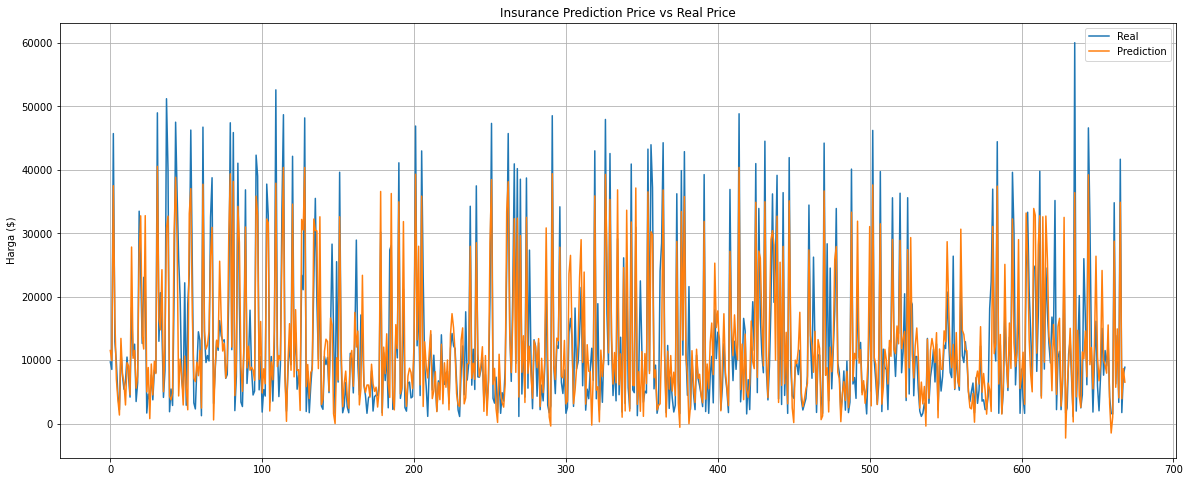

In [8]:
y_pred = model.predict(X_test)

plt.figure(figsize=(20,8))
plt.plot(np.arange(len(y_test)), y_test, label='Real')
plt.plot(np.arange(len(y_test)), y_pred, label='Prediction')
plt.title('Insurance Prediction Price vs Real Price')
plt.ylabel('Harga ($)')
plt.grid(True)
plt.legend()
plt.show()